# Поиск наиболее близкого имени участника

In [2]:
from jellyfish import levenshtein_distance

In [3]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [4]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### С библиотекой Levenshtein

In [5]:
levenshtein_distance('Оксана', 'Анна')

4

In [6]:
for recognized_name in speech_recognition:
    print(recognized_name)

кучменко она
кущенко оксана
груздь алина
рычихина наталья
шиховцева на
чистова анастасия


In [7]:
for recognized_name in speech_recognition:
    for real_name in claim_list:
        print('{},{},{}'.format(recognized_name, real_name, levenshtein_distance(recognized_name, real_name)))

кучменко она,Шехавцова Анна,11
кучменко она,Гречихина Наталья,14
кучменко она,Козлова Алена,11
кучменко она,Груздева Алина,10
кучменко она,Кущенко Анна,5
кучменко она,Чистякова Анастасия,15
кущенко оксана,Шехавцова Анна,11
кущенко оксана,Гречихина Наталья,15
кущенко оксана,Козлова Алена,11
кущенко оксана,Груздева Алина,11
кущенко оксана,Кущенко Анна,5
кущенко оксана,Чистякова Анастасия,14
груздь алина,Шехавцова Анна,11
груздь алина,Гречихина Наталья,14
груздь алина,Козлова Алена,9
груздь алина,Груздева Алина,5
груздь алина,Кущенко Анна,10
груздь алина,Чистякова Анастасия,16
рычихина наталья,Шехавцова Анна,14
рычихина наталья,Гречихина Наталья,3
рычихина наталья,Козлова Алена,14
рычихина наталья,Груздева Алина,14
рычихина наталья,Кущенко Анна,14
рычихина наталья,Чистякова Анастасия,12
шиховцева на,Шехавцова Анна,6
шиховцева на,Гречихина Наталья,14
шиховцева на,Козлова Алена,9
шиховцева на,Груздева Алина,9
шиховцева на,Кущенко Анна,10
шиховцева на,Чистякова Анастасия,13
чистова анастасия

### Без библиотеки из файла 'recognized_stats.txt'

In [8]:
distances = []

f = open('recognized_stats.txt', mode = 'r', encoding = 'utf-8')

lines = [line.strip().split(';') for line in f]

for line in lines: 
    for rec in line:
        recognized_name, real_name, distance = rec.split(',')
        print(recognized_name, real_name, distance)

кучменко она Шехавцова Анна 11
кучменко она Гречихина Наталья 14
кучменко она Козлова Алена 11
кучменко она Груздева Алина 10
кучменко она Кущенко Анна 5
кучменко она Чистякова Анастасия 15
кущенко оксана Шехавцова Анна 11
кущенко оксана Гречихина Наталья 15
кущенко оксана Козлова Алена 11
кущенко оксана Груздева Алина 11
кущенко оксана Кущенко Анна 5
кущенко оксана Чистякова Анастасия 14
груздь алина Шехавцова Анна 11
груздь алина Гречихина Наталья 14
груздь алина Козлова Алена 9
груздь алина Груздева Алина 5
груздь алина Кущенко Анна 10
груздь алина Чистякова Анастасия 16
рычихина наталья Шехавцова Анна 14
рычихина наталья Гречихина Наталья 3
рычихина наталья Козлова Алена 14
рычихина наталья Груздева Алина 14
рычихина наталья Кущенко Анна 14
рычихина наталья Чистякова Анастасия 12
шиховцева на Шехавцова Анна 6
шиховцева на Гречихина Наталья 14
шиховцева на Козлова Алена 9
шиховцева на Груздева Алина 9
шиховцева на Кущенко Анна 10
шиховцева на Чистякова Анастасия 13
чистова анастасия

### Сортировка словаря

In [15]:
distances=dict({})
for recognized_name in speech_recognition:
    distances.update({recognized_name: {real_name: 
                                   levenshtein_distance(recognized_name, real_name) for real_name in claim_list}})
distances

{'кучменко она': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 14,
  'Козлова Алена': 11,
  'Груздева Алина': 10,
  'Кущенко Анна': 5,
  'Чистякова Анастасия': 15},
 'кущенко оксана': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 15,
  'Козлова Алена': 11,
  'Груздева Алина': 11,
  'Кущенко Анна': 5,
  'Чистякова Анастасия': 14},
 'груздь алина': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 14,
  'Козлова Алена': 9,
  'Груздева Алина': 5,
  'Кущенко Анна': 10,
  'Чистякова Анастасия': 16},
 'рычихина наталья': {'Шехавцова Анна': 14,
  'Гречихина Наталья': 3,
  'Козлова Алена': 14,
  'Груздева Алина': 14,
  'Кущенко Анна': 14,
  'Чистякова Анастасия': 12},
 'шиховцева на': {'Шехавцова Анна': 6,
  'Гречихина Наталья': 14,
  'Козлова Алена': 9,
  'Груздева Алина': 9,
  'Кущенко Анна': 10,
  'Чистякова Анастасия': 13},
 'чистова анастасия': {'Шехавцова Анна': 13,
  'Гречихина Наталья': 12,
  'Козлова Алена': 12,
  'Груздева Алина': 14,
  'Кущенко Анна': 14,
  'Чистякова Анастасия': 4}}

In [48]:
resp=[list(distances.keys()),[min(i,key=i.get) for i in distances.values()]]
list(map(list, zip(*resp)))

[['кучменко она', 'Кущенко Анна'],
 ['кущенко оксана', 'Кущенко Анна'],
 ['груздь алина', 'Груздева Алина'],
 ['рычихина наталья', 'Гречихина Наталья'],
 ['шиховцева на', 'Шехавцова Анна'],
 ['чистова анастасия', 'Чистякова Анастасия']]

# Пример с распознаванием цифр

In [49]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [50]:
digits = datasets.load_digits()

Пример первой цифры

In [4]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [52]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

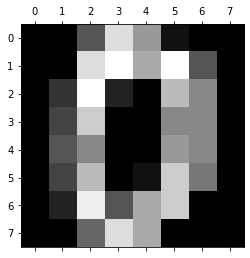

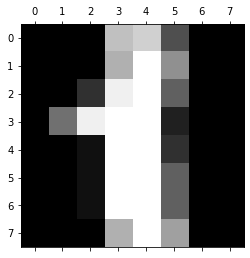

In [53]:
plt.gray()
for i in range(0, 2):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [54]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [55]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [56]:
split = int( n_samples * .9 )
split

1617

Разделение выборки

In [57]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

In [58]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

Формируем тестовую выборку и обучаем модель knn

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [82]:
knn.score( X_test, Y_test )

0.9666666666666667